<a href="https://colab.research.google.com/github/rutavmehta/BML/blob/main/Skill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 1: Dataset Loading**

Dataset loading is the process of importing data from a file (like CSV) into a structure (e.g., DataFrame in pandas) for analysis.

Printing information involves displaying details about the dataset, such as its first few rows, data types, shape, and summary statistics to understand its structure and content.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/MIT Classwork/archive (3).csv")

# Display first few rows
print("\n===== FIRST FEW ROWS =====")
print(df.head(200))

# Show dataset info and basic stats
print("\n===== DATAFRAME INFO =====")
print(df.info())

print("\n===== DATA SUMMARY =====")
print(df.describe())


===== FIRST FEW ROWS =====
    Ticket_ID  Age  Ticket_Price Movie_Genre Seat_Type Number_of_Person  \
0       N4369   55         12.27      Comedy  Standard                7   
1       B8091   35         19.02       Drama  Standard            Alone   
2       V6341   55         22.52      Horror       VIP                3   
3       B3243   53         23.01       Drama  Standard                6   
4       I3814   30         21.81      Comedy       VIP                4   
..        ...  ...           ...         ...       ...              ...   
195     U3623   58         23.95       Drama       VIP            Alone   
196     M9809   39         14.40       Drama       VIP                2   
197     S9804   60         24.08      Comedy  Standard            Alone   
198     H4173   54         14.83      Action   Premium                5   
199     Z2710   23         20.57      Action       VIP                6   

    Purchase_Again  
0               No  
1              Yes  
2       

**Experiment 2: Dataset Cleaning**

Dataset cleaning is the process of fixing or removing incorrect, incomplete, duplicate, or irrelevant data to ensure the dataset is accurate, consistent, and ready for analysis. This includes handling missing values, duplicates, and formatting errors.

In [ ]:
# Drop rows with missing values and duplicates
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

# Reset index for a clean look
df.reset_index(drop=True, inplace=True)

# Check for any remaining null values or duplicates
print("\n===== NULL VALUE CHECK =====")
print(df.isnull().any())

print("\n===== NULL VALUE COUNT =====")
print(df.isnull().sum())

print("\n===== DUPLICATES CHECK =====")
print(df.duplicated().sum())



===== NULL VALUE CHECK =====
Ticket_ID           False
Age                 False
Ticket_Price        False
Movie_Genre         False
Seat_Type           False
Number_of_Person    False
Purchase_Again      False
dtype: bool

===== NULL VALUE COUNT =====
Ticket_ID           0
Age                 0
Ticket_Price        0
Movie_Genre         0
Seat_Type           0
Number_of_Person    0
Purchase_Again      0
dtype: int64

===== DUPLICATES CHECK =====
0


**Experiment 3 - Part 1: Label Encoding**

Label encoding is the process of converting categorical data into numerical values, where each category is assigned a unique number — for example, "Male" becomes 0 and "Female" becomes 1. This helps machine learning models interpret categorical features that are ordinal or binary.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns that need encoding
categorical_cols = ['Movie_Genre', 'Seat_Type', 'Number_of_Person', 'Purchase_Again']

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display dataset after label encoding
print("\n===== Label Encoded Dataset =====")
print(df.head())



===== Label Encoded Dataset =====
  Ticket_ID  Age  Ticket_Price  Movie_Genre  Seat_Type  Number_of_Person  \
0     N4369   55         12.27            1          1                 5   
1     B8091   35         19.02            2          1                 6   
2     V6341   55         22.52            3          2                 1   
3     B3243   53         23.01            2          1                 4   
4     I3814   30         21.81            1          2                 2   

   Purchase_Again  
0               0  
1               1  
2               0  
3               1  
4               1  


**Experiment 3 - Part 2: OneHot Encoding**

One-hot encoding is a technique that transforms categorical data into a series of binary columns, where each category gets its own column with values 0 or 1. For example, the "Color" feature with categories "Red," "Blue," and "Green" becomes three columns: Color_Red, Color_Blue, and Color_Green, where only one column is 1 (indicating the category) and the others are 0. This method prevents the model from misinterpreting categories as ordinal data.

In [ ]:
import pandas as pd

# Define multi-class categorical columns
multi_class_cols = ['Movie_Genre', 'Seat_Type', 'Number_of_Person']

# Apply One-Hot Encoding (creates dummy variables)
df_onehot = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Display dataset after one-hot encoding
print("\n===== One-Hot Encoded Dataset =====")
print(df_onehot.head())


===== One-Hot Encoded Dataset =====
  Ticket_ID  Age  Ticket_Price  Purchase_Again  Movie_Genre_1  Movie_Genre_2  \
0     N4369   55         12.27               0           True          False   
1     B8091   35         19.02               1          False           True   
2     V6341   55         22.52               0          False          False   
3     B3243   53         23.01               1          False           True   
4     I3814   30         21.81               1           True          False   

   Movie_Genre_3  Movie_Genre_4  Seat_Type_1  Seat_Type_2  Number_of_Person_1  \
0          False          False         True        False               False   
1          False          False         True        False               False   
2           True          False        False         True                True   
3          False          False         True        False               False   
4          False          False        False         True               False

**Experiment 4 - Part 1: Standard Scaling**

Standard scaling is a data preprocessing technique that transforms numerical features to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the model.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select numerical columns (excluding Ticket_ID because it's categorical)
numerical_cols = ['Age', 'Ticket_Price']

# Apply Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

# Display the first few rows after Standard Scaling
print("\n===== Standard Scaled Data =====")
print(df_standard_scaled.head())



===== Standard Scaled Data =====
  Ticket_ID       Age  Ticket_Price  Movie_Genre  Seat_Type  Number_of_Person  \
0     N4369  1.295699     -1.163440            1          1                 5   
1     B8091 -0.314351      0.372200            2          1                 6   
2     V6341  1.295699      1.168458            3          2                 1   
3     B3243  1.134694      1.279934            2          1                 4   
4     I3814 -0.716863      1.006932            1          2                 2   

   Purchase_Again  
0               0  
1               1  
2               0  
3               1  
4               1  


**Experiment 4 - Part 2: MinMax Scaling**

Min-Max Scaling is a data preprocessing technique that transforms numerical features to a fixed range, usually 0 to 1, by subtracting the minimum value and dividing by the range (max - min), preserving the original data distribution.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns (excluding Ticket_ID because it's categorical)
numerical_cols = ['Age', 'Ticket_Price']

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

# Display the first few rows after Min-Max Scaling
print("\n===== Min-Max Scaled Data =====")
print(df_minmax_scaled.head())



===== Min-Max Scaled Data =====
  Ticket_ID       Age  Ticket_Price  Movie_Genre  Seat_Type  Number_of_Person  \
0     N4369  0.880952      0.150868            1          1                 5   
1     B8091  0.404762      0.601469            2          1                 6   
2     V6341  0.880952      0.835113            3          2                 1   
3     B3243  0.833333      0.867824            2          1                 4   
4     I3814  0.285714      0.787717            1          2                 2   

   Purchase_Again  
0               0  
1               1  
2               0  
3               1  
4               1  


**Experiment 4 - Part 3: Normalising**

Normalization is a preprocessing technique that rescales data to have a standard range, typically between 0 and 1 or -1 and 1, ensuring all features contribute equally to the model and improving performance on algorithms that rely on distance measurements.

In [ ]:
import pandas as pd
from sklearn.preprocessing import Normalizer

# Select numerical columns (excluding Ticket_ID as it's categorical)
numerical_cols = ['Age', 'Ticket_Price']

# Apply L2 Normalization
normalizer = Normalizer(norm='l2')  # You can also use 'l1' or 'max' if needed
df_normalized = df.copy()
df_normalized[numerical_cols] = normalizer.fit_transform(df[numerical_cols])

# Display the first few rows after normalization
print("\n===== Normalized Data =====")
print(df_normalized.head())



===== Normalized Data =====
  Ticket_ID       Age  Ticket_Price  Movie_Genre  Seat_Type  Number_of_Person  \
0     N4369  0.976007      0.217738            1          1                 5   
1     B8091  0.878643      0.477480            2          1                 6   
2     V6341  0.925429      0.378921            3          2                 1   
3     B3243  0.917282      0.398239            2          1                 4   
4     I3814  0.808841      0.588027            1          2                 2   

   Purchase_Again  
0               0  
1               1  
2               0  
3               1  
4               1  


**Experiment 5 and 6: Plotting**

Plotting is the process of visually representing data using charts, graphs, or plots to identify patterns, trends, and relationships, making data analysis easier and more intuitive.

A histogram is a type of bar chart that shows the distribution of a dataset by grouping data into bins and counting the frequency of values in each bin.

A scatter plot displays individual data points on a two-dimensional graph, showing the relationship between two variables to identify patterns, correlations, or outliers.

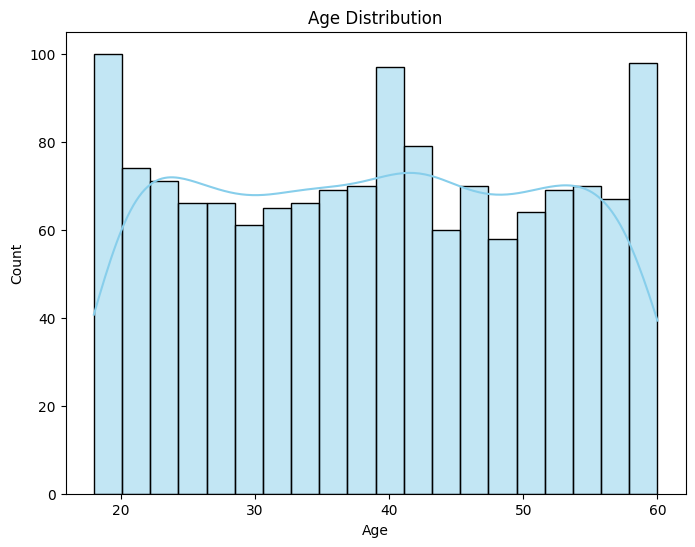

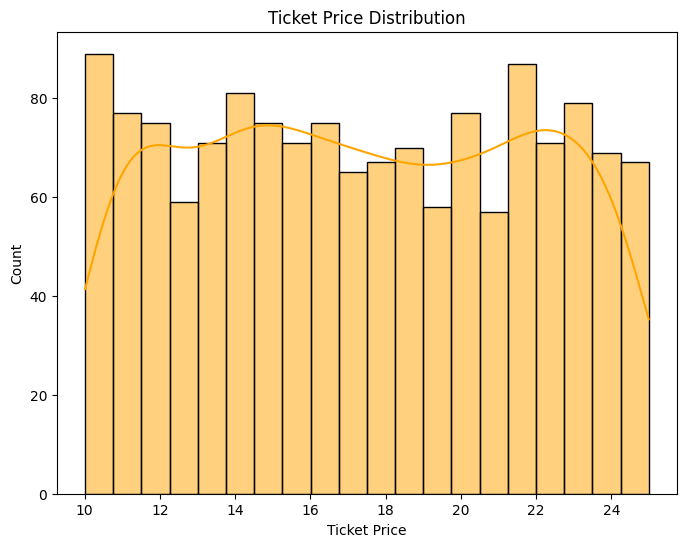

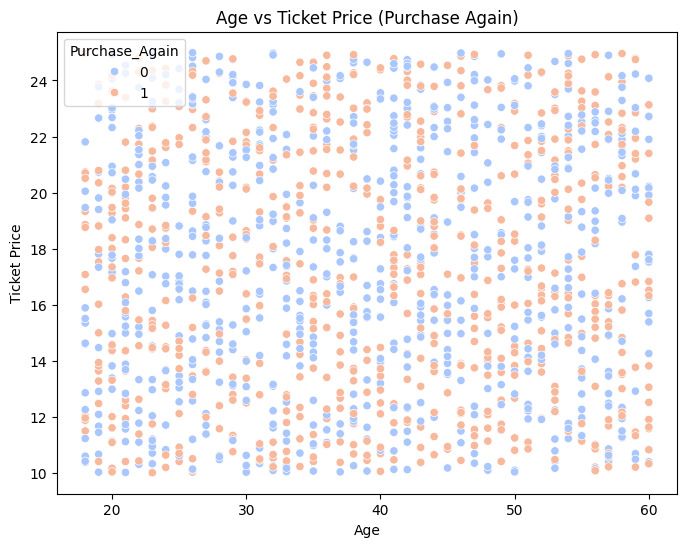

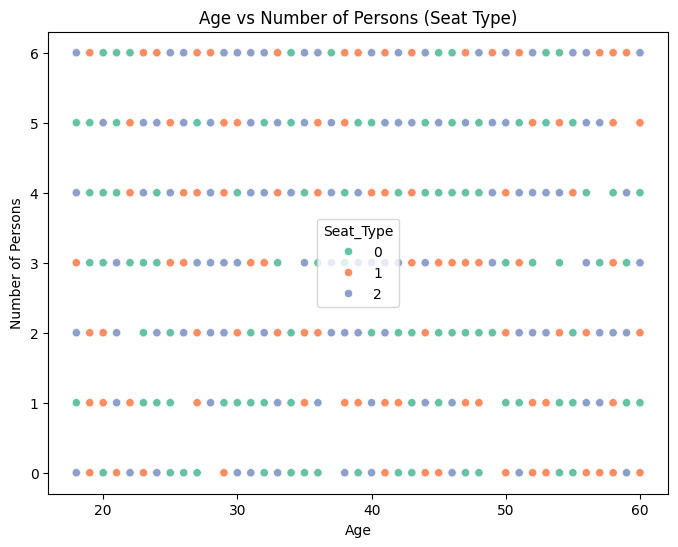

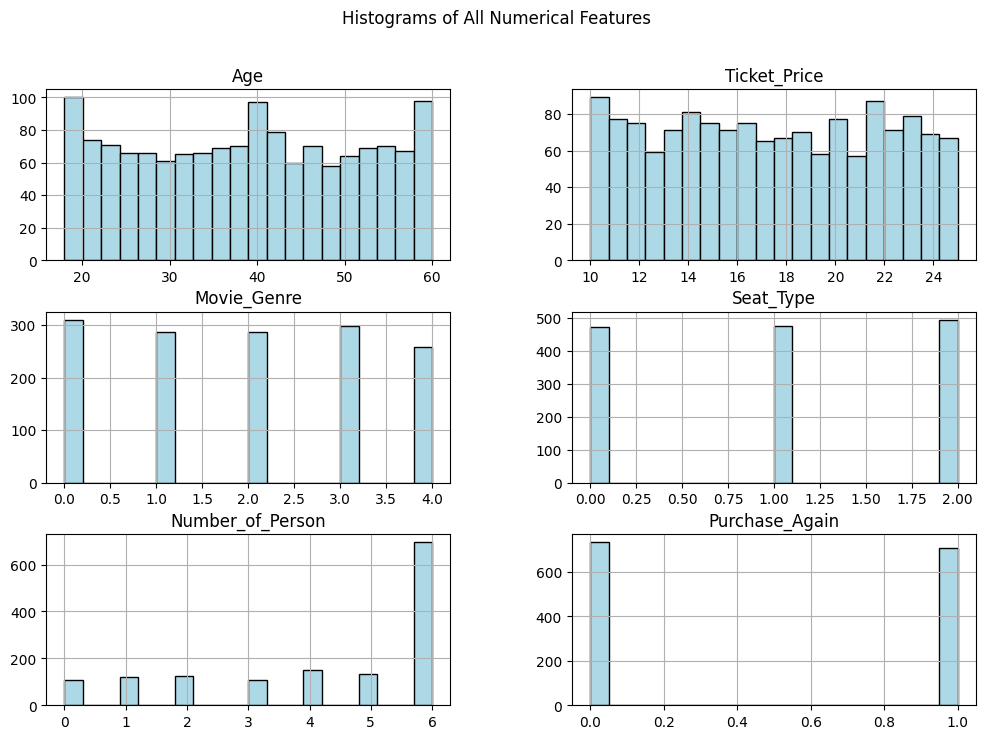

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Histogram: Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Histogram: Ticket Price Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df["Ticket_Price"], kde=True, bins=20, color="orange")
plt.title("Ticket Price Distribution")
plt.xlabel("Ticket Price")
plt.ylabel("Count")
plt.show()

# Scatter plot: Age vs Ticket Price colored by Purchase Again
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Ticket_Price", hue="Purchase_Again", palette="coolwarm")
plt.title("Age vs Ticket Price (Purchase Again)")
plt.xlabel("Age")
plt.ylabel("Ticket Price")
plt.show()

# Scatter plot: Age vs Number of Persons colored by Seat Type
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y=df["Number_of_Person"].replace("Alone", 1).astype(int), hue="Seat_Type", palette="Set2")
plt.title("Age vs Number of Persons (Seat Type)")
plt.xlabel("Age")
plt.ylabel("Number of Persons")
plt.show()

# Histograms for all numerical features
df.hist(figsize=(12, 8), bins=20, edgecolor="black", color="lightblue")
plt.suptitle("Histograms of All Numerical Features")
plt.show()


**Experiment 7 and 8 - Filter Method: Pearsons Correlation Test**

Pearsons Correlation Test measures the linear relationship between two continuous variables. If the value is -1 then it is strong negative correlation, if the value is 1 then it is strong positive correlation and if the value is 0 then there is no correlation.


===== Pearson Correlation Test =====
Feature: Age, Correlation: 0.0365, P-value: 0.1659
Feature: Movie_Genre_Comedy, Correlation: -0.0114, P-value: 0.6650
Feature: Movie_Genre_Drama, Correlation: -0.0215, P-value: 0.4152
Feature: Movie_Genre_Horror, Correlation: 0.0384, P-value: 0.1448
Feature: Movie_Genre_Sci-Fi, Correlation: 0.0447, P-value: 0.0900
Feature: Seat_Type_Standard, Correlation: -0.0343, P-value: 0.1927
Feature: Seat_Type_VIP, Correlation: 0.0173, P-value: 0.5113
Feature: Number_of_Person_3, Correlation: 0.0222, P-value: 0.4007
Feature: Number_of_Person_4, Correlation: -0.0429, P-value: 0.1036
Feature: Number_of_Person_5, Correlation: -0.0093, P-value: 0.7251
Feature: Number_of_Person_6, Correlation: 0.0041, P-value: 0.8775
Feature: Number_of_Person_7, Correlation: 0.0124, P-value: 0.6395
Feature: Number_of_Person_Alone, Correlation: 0.0174, P-value: 0.5103
Feature: Purchase_Again_Yes, Correlation: -0.0227, P-value: 0.3892

===== Features Above Correlation Threshold =====

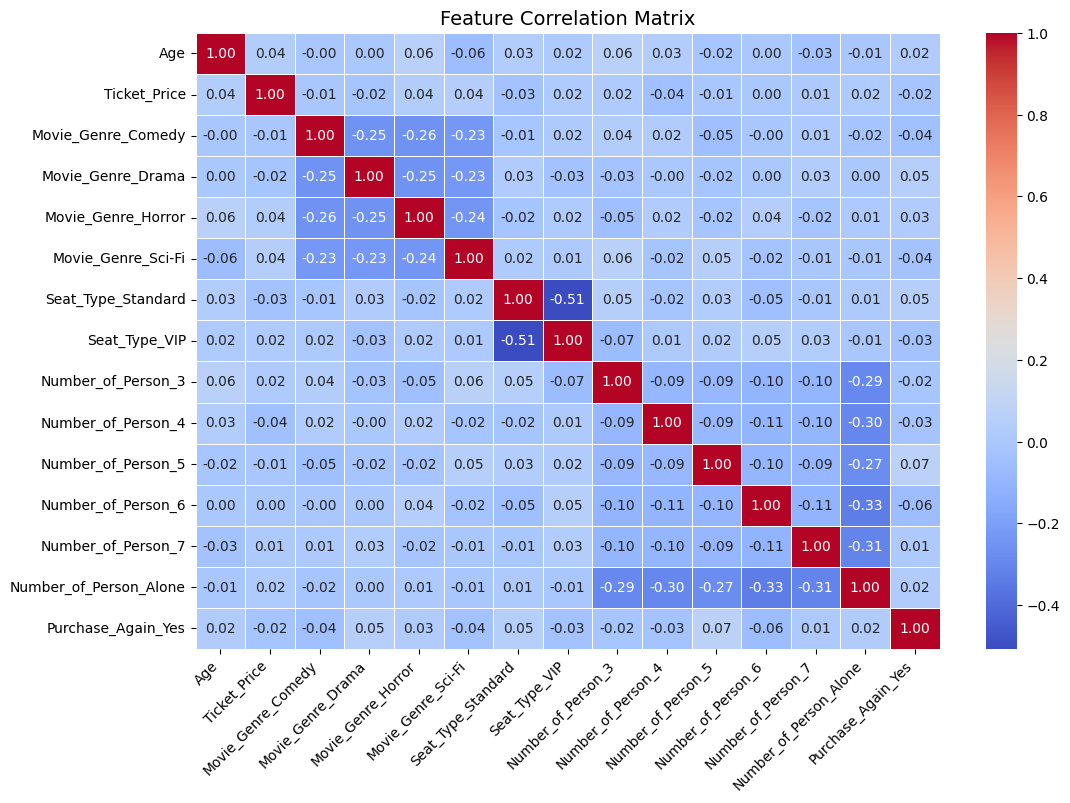

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/MIT Classwork/archive (3).csv')

# Drop 'Ticket_ID' (not useful for correlation)
df.drop(columns=['Ticket_ID'], inplace=True)

# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Perform Pearson Correlation Test for each feature with 'Ticket_Price'
target_column = 'Ticket_Price'
numerical_features = df_encoded.columns.tolist()

if target_column in numerical_features:
    numerical_features.remove(target_column)  # Remove target from the independent feature list

# Pearson correlation test results
print("\n===== Pearson Correlation Test =====")
correlation_results = {}
for feature in numerical_features:
    corr, p_value = pearsonr(df_encoded[feature], df_encoded[target_column])
    correlation_results[feature] = (corr, p_value)
    print(f"Feature: {feature}, Correlation: {corr:.4f}, P-value: {p_value:.4f}")

# Apply threshold-based filtering
threshold = 0.2  # Adjust this threshold as needed
filtered_features = {k: v for k, v in correlation_results.items() if abs(v[0]) >= threshold}

# Display filtered features
print("\n===== Features Above Correlation Threshold =====")
if filtered_features:
    for feature, (corr, p_value) in filtered_features.items():
        print(f"Feature: {feature}, Correlation: {corr:.4f}, P-value: {p_value:.4f}")
else:
    print("No features meet the correlation threshold.")

# Plot heatmap with values inside boxes
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix,
            annot=True,        # Show values inside boxes
            fmt=".2f",         # 2 decimal places
            cmap="coolwarm",   # Better color contrast
            linewidths=0.5,    # Add box separation
            annot_kws={"size": 10})  # Adjust text size

# Improve layout
plt.title("Feature Correlation Matrix", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


**Experiment 7 and 8 - Filter Method: ANOVA**

ANOVA (Analysis of Variance). It compares the mean of two or more groups to determine if there is a significant difference between them, which helps to find relationship between categorical independent variables and a continuous dependent variable.

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MIT Classwork/archive (3).csv')

# Drop 'Ticket_ID' (not useful)
df.drop(columns=['Ticket_ID'], inplace=True)

# Encode target variable ('Yes'/'No') → (1/0)
df['Purchase_Again'] = LabelEncoder().fit_transform(df['Purchase_Again'])

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Handle missing values
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Perform ANOVA F-Test
f_scores, p_values = f_classif(df[numerical_features], df['Purchase_Again'])

# Print results
print("\n===== ANOVA Feature Selection Results =====")
for feature, score, p_value in zip(numerical_features, f_scores, p_values):
    print(f"{feature}: F-Score={score:.2f}, P-Value={p_value:.4f}")

# Print significant features (p < 0.05)
significant_features = [feature for feature, p in zip(numerical_features, p_values) if p < 0.05]

print("\n===== Statistically Significant Features (p < 0.05) =====")
print(significant_features if significant_features else "No significant features found.")



===== ANOVA Feature Selection Results =====
Age: F-Score=0.79, P-Value=0.3749
Ticket_Price: F-Score=0.74, P-Value=0.3892
Purchase_Again: F-Score=inf, P-Value=0.0000

===== Statistically Significant Features (p < 0.05) =====
['Purchase_Again']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


**Experiment 7 and 8 - Filter Method: Chi-Square**

The Chi-Square test is used to find the connection between two categories and it compares the observed frequencies and the expected frequencies	 to determine if they are independent.

In [8]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Define categorical features and target variable
categorical_features = ['Movie_Genre', 'Seat_Type', 'Number_of_Person']
target_column = 'Purchase_Again'  # Assuming this is categorical (Yes/No)

# Convert target column to numeric (Yes -> 1, No -> 0)
df[target_column] = df[target_column].astype('category').cat.codes

# One-hot encode categorical features
df_encoded = pd.get_dummies(df[categorical_features])

# Perform Chi-Square test with SelectKBest
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(df_encoded, df[target_column])

# Get feature scores and apply threshold (50th percentile)
feature_scores = selector.scores_
threshold = np.percentile(feature_scores, 50)

# Display features above threshold
print("\n===== Chi-Square Features (Above Threshold) =====")
for feature, score in zip(df_encoded.columns, feature_scores):
    if score >= threshold:
        print(f"Feature: {feature}, Score: {score:.4f}")

# Select top-K features based on Chi-Square score
k = 5  # Adjust the number of top features you want
top_k_selector = SelectKBest(score_func=chi2, k=k)
top_k_selector.fit(df_encoded, df[target_column])
top_k_features = df_encoded.columns[top_k_selector.get_support()]

# Display top-K features
print("\n===== Top-K Chi-Square Features =====")
for feature in top_k_features:
    score = top_k_selector.scores_[df_encoded.columns.get_loc(feature)]
    print(f"Feature: {feature}, Score: {score:.4f}")



===== Chi-Square Features (Above Threshold) =====
Feature: Movie_Genre_Comedy, Score: 2.3233
Feature: Movie_Genre_Drama, Score: 2.5808
Feature: Movie_Genre_Sci-Fi, Score: 1.4505
Feature: Seat_Type_Standard, Score: 2.0998
Feature: Seat_Type_VIP, Score: 1.0787
Feature: Number_of_Person_4, Score: 1.0914
Feature: Number_of_Person_5, Score: 6.7810
Feature: Number_of_Person_6, Score: 4.8889

===== Top-K Chi-Square Features =====
Feature: Movie_Genre_Comedy, Score: 2.3233
Feature: Movie_Genre_Drama, Score: 2.5808
Feature: Seat_Type_Standard, Score: 2.0998
Feature: Number_of_Person_5, Score: 6.7810
Feature: Number_of_Person_6, Score: 4.8889


**Experiment 7 and 8 - Filter Method: Information Gain**

Information Gain is a way to measure that how much a feature helps in making a better prediction. It measures how much a feature reduces uncertainty by comparing the level of uncertainty before and after the data is split using that feature.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Define target variable
target_column = 'Purchase_Again'  # Assuming this is categorical (Yes/No)

# Convert target to numeric (Yes -> 1, No -> 0)
df[target_column] = df[target_column].astype('category').cat.codes

# Select numerical features, excluding 'Ticket_ID' only if it exists
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
if "Ticket_ID" in numerical_features:
    numerical_features = numerical_features.drop("Ticket_ID")

# Convert to NumPy array
numerical_features = np.array(numerical_features)

# Ensure there are numerical features
if len(numerical_features) == 0:
    print("No numerical features found!")
else:
    # Compute mutual information (information gain)
    mi_scores = mutual_info_classif(df[numerical_features], df[target_column])

    # Apply threshold-based filtering (50th percentile)
    threshold = np.percentile(mi_scores, 50)

    # Display features above threshold
    print("\n===== Features Above Threshold =====")
    for feature, score in zip(numerical_features, mi_scores):
        if score >= threshold:
            print(f"Feature: {feature}, Info Gain: {score:.4f}")

    # Select top-K features based on mutual information
    k = min(5, len(numerical_features))  # Ensure k does not exceed available features
    top_k_selector = SelectKBest(mutual_info_classif, k=k)
    top_k_selector.fit(df[numerical_features], df[target_column])
    selected_features = numerical_features[top_k_selector.get_support()]

    # Display top-K selected features
    print("\n===== Top-K Features =====")
    for feature in selected_features:
        score_index = list(numerical_features).index(feature)  # Ensure indexing works
        print(f"Feature: {feature}, Info Gain: {mi_scores[score_index]:.4f}")



===== Features Above Threshold =====
Feature: Age, Info Gain: 0.0000
Feature: Ticket_Price, Info Gain: 0.0097
Feature: Movie_Genre, Info Gain: 0.0000
Feature: Seat_Type, Info Gain: 0.0080
Feature: Number_of_Person, Info Gain: 0.0000

===== Top-K Features =====
Feature: Age, Info Gain: 0.0000
Feature: Ticket_Price, Info Gain: 0.0097
Feature: Movie_Genre, Info Gain: 0.0000
Feature: Seat_Type, Info Gain: 0.0080
Feature: Number_of_Person, Info Gain: 0.0000


**Experiment 9 and 10 - Wrapper Method: Forward Selection**

Forward Selection is a step-by-step feature selection technique that starts with no features and adds one feature at a time — the one that improves the model performance the most — until adding more features no longer improves the model significantly.

In [12]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MIT Classwork/archive (3).csv')

# Drop 'Ticket_ID' because it's just an identifier
df.drop(columns=['Ticket_ID'], inplace=True)

# Define target variable
target_column = 'Purchase_Again'
y = df[target_column]

# Encode categorical target variable
y = LabelEncoder().fit_transform(y)  # Converts Yes/No to 1/0

# Encode categorical features
X = df.drop(columns=[target_column])
label_encoders = {}  # Store encoders for potential inverse transformation
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Handle missing values (if any)
X = X.fillna(X.median())

# Forward Selection Algorithm
selected_features = []
remaining_features = list(X.columns)

for _ in range(len(remaining_features)):
    best_score = float('-inf')
    best_feature = None

    for feature in remaining_features:
        trial_features = selected_features + [feature]
        X_trial = sm.add_constant(X[trial_features])  # Add constant term for OLS
        model = sm.OLS(y, X_trial).fit()

        if model.rsquared > best_score:
            best_score = model.rsquared
            best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

print("\nSelected Features (Forward Selection):", selected_features)



Selected Features (Forward Selection): ['Number_of_Person', 'Age', 'Ticket_Price', 'Seat_Type', 'Movie_Genre']


**Experiment 9 and 10 - Wrapper Method: Backward Elimination**

Backward Elimination is a feature selection technique that starts with all features and removes the least significant one at each step — based on a statistical measure (like p-values in regression) — until only the most important features remain.

In [35]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MIT Classwork/archive (3).csv')

# Drop 'Ticket_ID' (not useful)
df.drop(columns=['Ticket_ID'], inplace=True)

# Define target variable
target_column = 'Purchase_Again'
y = LabelEncoder().fit_transform(df[target_column])  # Convert Yes/No to 1/0

# Encode categorical features
X = df.drop(columns=[target_column])
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Handle missing values
X.fillna(X.median(), inplace=True)

# Start with all features
features = list(X.columns)
X_with_const = sm.add_constant(X[features])  # Add constant term for OLS

# Backward Elimination Process
removed_features = []  # Track removed features

while len(features) > 0:
    model = sm.OLS(y, X_with_const).fit()
    p_values = model.pvalues[1:]  # Exclude intercept

    worst_p = p_values.idxmax()  # Feature with highest p-value
    if p_values[worst_p] > 0.5:  # Threshold = 0.5
        print(f"Removing '{worst_p}' (p-value: {p_values[worst_p]:.4f})")
        features.remove(worst_p)
        removed_features.append(worst_p)

        if len(features) == 0:  # Stop if no features remain
            print("\nNo significant features left after backward elimination.")
            break

        X_with_const = sm.add_constant(X[features])
    else:
        break

# Display the final selected features
if features:
    print("\nSelected Features:", features)
else:
    print("\nNo features were selected. Consider adjusting the p-value threshold.")


Removing 'Movie_Genre' (p-value: 0.9244)
Removing 'Seat_Type' (p-value: 0.5837)

Selected Features: ['Age', 'Ticket_Price', 'Number_of_Person']


**Experiment 9 and 10 - Wrapper Method: Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes the least important features based on a model (like a classifier or regressor) until the desired number of features is reached, improving model performance.

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_].tolist()
print("Selected Features (RFE):", selected_features)


Selected Features (RFE): ['Age', 'Ticket_Price', 'Movie_Genre', 'Seat_Type', 'Number_of_Person']


**Experiment 9 and 10 - Wrapper Method: Cross Validation (CV)**

Cross-validation (CV) is a technique to evaluate a model’s performance by splitting the data into multiple parts — training on some parts and testing on the remaining — to ensure the model generalizes well to unseen data.

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())


Cross-Validation Scores: [-0.11108502 -0.14712476 -0.12570144 -0.08087296 -0.10564082]
Average CV Score: -0.11408500019473355


**Experiment 11 - Feature Selection using Embedded Methods**

**1. Lasso Method**